# Bike Sharing Assignment

**Problem Statement:**

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

**Business Goal:** 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing library to split data into test and train data set
from sklearn.model_selection import train_test_split

# for rescaling feature
from sklearn.preprocessing import MinMaxScaler

# For RFE and linear regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#For adding constant variable
import statsmodels.api as sm 

# for calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For R2 score
from sklearn.metrics import r2_score

# For ignoring warnings in code execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file
data=pd.read_csv('day.csv')

In [3]:
#checking data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking size of data
data.shape

(730, 16)

In [5]:
#checing for null values 
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As observed,there is no null value in the data 

In [6]:
#checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking the stats of numerical data fields 
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since the difference between mean and max is not much so there are no outliers

In [8]:
# Dropping the non relevant fields from the data
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Data Visualization

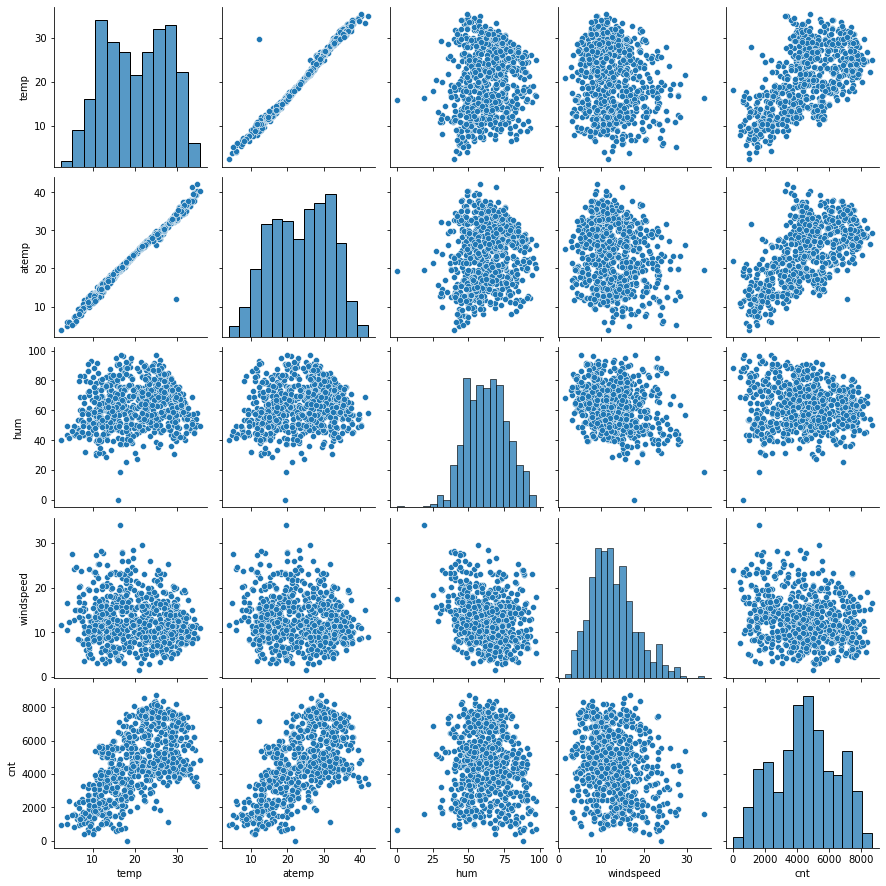

In [10]:
# plotting the numerical values in pairplot
sns.pairplot(data=data,vars=[ 'temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

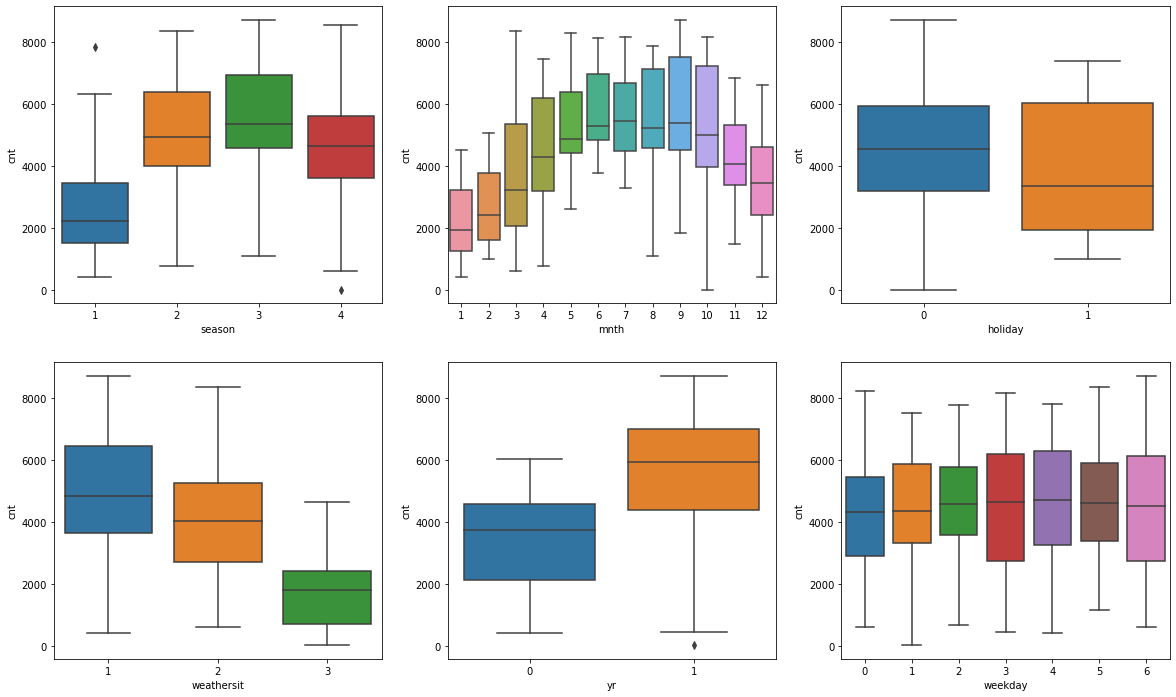

In [11]:
# Analysing categorical columns 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.show()

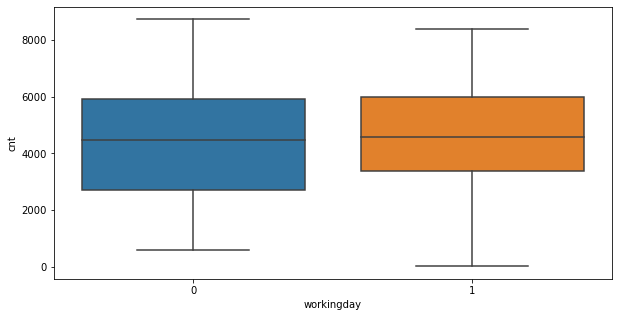

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday',y='cnt',data=data)
plt.show()

**Observation:**
- Bike sharing is high for Fall season.
- It is less for holiday's.
- Bike sharing is more for Clear, Few clouds, Partly cloudy, Partly cloudy.
- For 2019 the bike sharing has increased.
- Sharing is almost same whether it is working day or not.
- Midyear months have high number of bike sharing number.

## Step 3: Data Preparation

In [13]:
#Mapping month number with month name 
data.mnth = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [14]:
#mapping season name in column
data.season = data.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [15]:
#mapping Weekday name in column
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
#mapping weather name in column
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})

In [17]:
# new data 
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variable

In [18]:
# Creating dummy variable for season column
df_season = pd.get_dummies(data['season'],drop_first = True)
df_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
#creating dummy variable for mnth,weekday,weathersit
df_mnth = pd.get_dummies(data['mnth'],drop_first = True)
df_weekday = pd.get_dummies(data['weekday'],drop_first = True)
df_weathersit = pd.get_dummies(data['weathersit'],drop_first = True)

In [20]:
# merging dummy variable with original data set
data=pd.concat([data,df_season,df_mnth,df_weekday,df_weathersit],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Mist
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Dropping columns for which dummy variable are created
data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [22]:
#shape of data
data.shape

(730, 30)

In [23]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light_Snow', 'Mist'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [24]:
#specify this so that the train and test data set always have the same number of rows
np.random.seed(0)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
#shape of training model
df_train.shape

(510, 30)

In [26]:
#shape of testing model
df_test.shape

(219, 30)

### Rescaling the features

In [27]:
scaler=MinMaxScaler()

In [28]:
#Rescaling features 
var=['temp','atemp','hum','windspeed','cnt']
df_train[var]=scaler.fit_transform(df_train[var])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


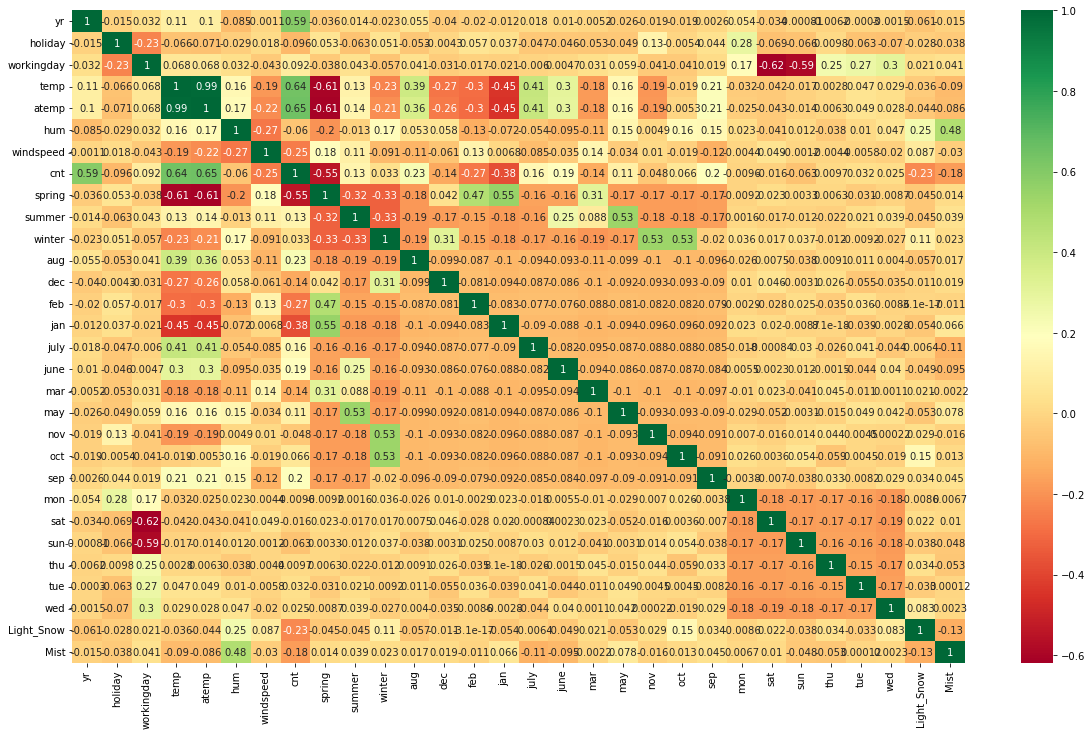

In [30]:
#Checking correlation value of the data
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")
plt.show()

**Observation:**
- Column temp and atemp have high correlation.
- Cnt has high correlation with temp,atemp and yr.

### Dividing into X and Y sets for the model building

In [31]:
y_train=df_train.pop('cnt')
X_train=df_train

## Step 5: Building Model

**RFE**

In [32]:
# Using RFE with output number 12
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,12)
rfe=rfe.fit(X_train,y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 16),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 8),
 ('mar', False, 12),
 ('may', False, 18),
 ('nov', False, 5),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 17),
 ('sat', False, 2),
 ('sun', False, 10),
 ('thu', False, 15),
 ('tue', False, 11),
 ('wed', False, 13),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

Considering  columns selected by RFE

In [34]:
#RFE selected columns
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'july', 'sep', 'Light_Snow', 'Mist'],
      dtype='object')

In [35]:
#columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [36]:
# df with RFE selected columns
X_train_rfe=X_train[col]

**Adding constant else the line will pass through the origin by default**

In [37]:
X_train_rfe=sm.add_constant(X_train_rfe) 

In [38]:
#running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [39]:
#checking summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.69e-190
Time:                        17:08:57   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.000       0.216       0.352
yr             0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
summer         0.0519      0.015      3.457      0.001       0.022       0.081
winter         0.0987      0.017      5.719      0.000       0.065       0.133
july          -0.0575      0.018     -3.140      0.002      -0.094      -0.022
sep            0.0830      0.017      4.962      0.000       0.050       0.116
Light_Snow    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#dropping Constant to check for multicollinearity
X_train_new=X_train_rfe.drop(['const'],axis=1)

In [41]:
#function to check VIF

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Mist,2.28
0,yr,2.08
8,july,1.58
9,sep,1.38


**Humidity has high VIF so dropping hum**

In [42]:
X_train_new2=X_train_new.drop(['hum'],axis=1)

In [43]:
#adding constant
X_train_new2=sm.add_constant(X_train_new2)

#running second model
lm=sm.OLS(y_train,X_train_new2).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.40e-187
Time:                        17:08:57   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
yr             0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer         0.0453      0.015      2.971      0.003       0.015       0.075
winter         0.0831      0.017      4.818      0.000       0.049       0.117
july          -0.0524      0.019     -2.811      0.005      -0.089      -0.016
sep            0.0767      0.017      4.511      0.000       0.043       0.110
Light_Snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#dropping constant
X_train_new3=X_train_new2.drop(['const'],axis=1)

#function to check VIF
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,july,1.58
10,Mist,1.55
8,sep,1.34
9,Light_Snow,1.08


Since p < 0.05 and VIF also is tolerable we can consider 2nd model as final model

## Step 6: Residual Analysis of the train data

In [46]:
#final model
X_train_new2.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,july,sep,Light_Snow,Mist
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,1


In [47]:
y_train_pred=lm.predict(X_train_new2)

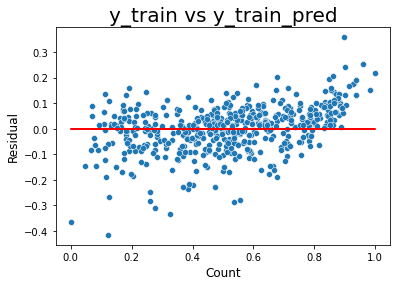

In [48]:
# Plotting y_train and y_train_pred to understand the spread.
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('y_train vs y_train_pred', fontsize=20)
#X-label
plt.xlabel('Count',fontsize=12)
#Y-label
plt.ylabel('Residual',fontsize=12)
plt.show()

There is no visible pattern in the graph

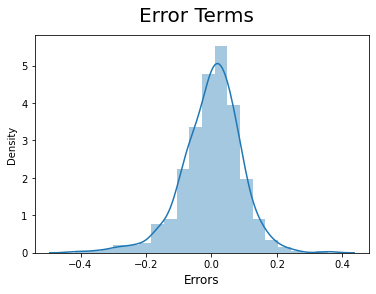

In [49]:
# Plot the histogram of the error term
fig = plt.figure()
sns.distplot((residual), bins = 20)
#plotting heading
fig.suptitle('Error Terms', fontsize = 20) 
#X axis label
plt.xlabel('Errors', fontsize = 12)    
plt.show()

The Error terms are normal 

## Step 7: Making Predictions

In [50]:
#Scalling test data
var=['temp','atemp','hum','windspeed','cnt']
df_test[var]=scaler.fit_transform(df_test[var])

In [51]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Mist
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [52]:
y_test=df_test.pop('cnt')
X_test=df_test

In [53]:
#making predictions using our model
X_test_new=X_test[X_train_new2.columns[1:]]

#adding const
X_test_new=sm.add_constant(X_test_new)

In [54]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'july', 'sep', 'Light_Snow', 'Mist'],
      dtype='object')

In [55]:
#Predicting y value from model
y_test_pred=lm.predict(X_test_new)

## Step 8 : Model Evaluation

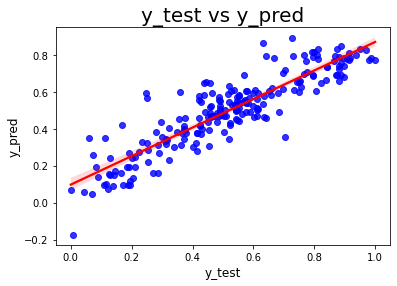

In [56]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
# X-label
plt.xlabel('y_test', fontsize=12)
# Y-label
plt.ylabel('y_pred', fontsize=12)
plt.show()

In [57]:
round(lm.params,4)

const         0.1996
yr            0.2335
holiday      -0.0980
temp          0.4915
windspeed    -0.1480
spring       -0.0669
summer        0.0453
winter        0.0831
july         -0.0524
sep           0.0767
Light_Snow   -0.2852
Mist         -0.0816
dtype: float64

Equation of the best fitted line is:

**cnt=0.1996+ 0.2335 x yr - 0.0980 x holiday + 0.4915 x temp - 0.1480 x windspeed - 0.0669 x spring +0.0453 x summer + 0.0831 x winter - 0.0524 x july + 0.0767 x sep - 0.2852 x Light_Snow - 0.0816 x Mist**

In [58]:
#R square value on test set
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7946

In [59]:
#adjusted R square value on test set
adj_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(adj_r2)

0.7827


### Comparison of R square and R adjusted:
- R2 value of train: 0.836
- R2 value of test: 0.7946
- Adjusted R2 value of train: 0.832
- Adjusted R2 value of test: 0.7827

#### Based upon the model we can conclude that demand of bikes depend on year, holiday, temp, windspeed, spring, summer, winter, july, sep, Light_Snow and Mist